# California Policing Scorecard

### Overview

The [California Police Scorecard](https://policescorecard.org) utilizes data on a range of policing-related issues to evaluate how each police department interacts with, and the extent to which officers are held accountable to, the communities they serve. The indicators included in this scorecard were selected based on a review of the [research literature](http://joincampaignzero.org/research), input from activists and experts in the field, and a review of existing publicly available datasets on policing in California. The scorecard is designed to help communities, researchers, police leaders and policy-makers take informed action to reduce police use of force and improve accountability and public safety in their jurisdictions. 

### About the Data
Data on police deadly force, civilian complaints and arrests that were obtained from official databases including the California Department of Justice’s [OpenJustice](https://openjustice.doj.ca.gov/data) database, UCR and the California Monthly Arrests and Citation Register. Data on police use of force, use of force complaints, and police policy manuals were obtained directly from police agencies via public records requests.


## Imports

In [2]:
import pandas
import numpy

## Display Settings

In [3]:
# Set display options to be able to view wide columns and many rows
pandas.set_option('display.max_columns', 500)
pandas.set_option('display.max_rows', 500)

## Data

In [35]:
raw = pandas.read_excel('data/raw/disparity analysis 2016-2018.xlsx')

In [36]:
raw.head()

,Agency Name,Asian / Pacific Islander Victims of Deadly Force,White Victims of Deadly Force,Black Victims of Deadly Force,Hispanic Victims of Deadly Force,Other Victims of Deadly Force,Percent Asian / Pacific Islander Deadly Force Victims,Percent White Deadly Force Victims,Percent Black Deadly Force Victims,Percent Hispanic Deadly Force Victims,Total Arrests 2016-2018,Asian/Pacific Islander Arrests,Black Arrests,Hispanic Arrests,White Arrests,Other Arrests,Percent Asian/Pacific Islander Arrests,Percent White Arrests,Percent Black Arrests,Percent Hispanic Arrests,Black Drug Possession Arrests,Hispanic Drug Possession Arrests,White Drug Possession Arrests,Black Drug Possession Arrest Disparity,Hispanic Drug Possession Arrest Disparity,Black Deadly Force per Arrest Rate,Black Deadly Force Disparity per Arrest,Black Deadly Force Disparity per Population,Hispanic Deadly Force per Arrest Rate,Hispanic Deadly Force Disparity per Arrest,Hispanic Deadly Force Disparity per Population,Total Population,Hispanic Population,White Population,Black Population,Asian / Pacific Islander Population,Other Population
0,Alameda Police Department,0,1,0,0,0,0.0000,1.000000,0.000000,0.000000,3581,263.418459,989.061763,755.464261,1322.062457,250.993060,0.073560,0.369188,0.276197,0.210965,17,25.0,49,1.897261,1.684697,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80060,10066,33238,6078,25280,4992
1,Alhambra Police Department,0,0,0,2,0,0.0000,0.000000,0.000000,1.000000,3911,303.724254,279.514350,2806.148002,345.541362,176.072032,0.077659,0.088351,0.071469,0.717501,12,214.0,34,2.204300,1.768305,0.000000,NaN,NaN,7.127208,NaN,NaN,84694,32234,9056,1450,42248,1487
2,Anaheim Police Department,1,4,1,9,1,0.0625,0.250000,0.062500,0.562500,28200,787.346311,2075.512295,15479.661885,7464.139344,2393.340164,0.027920,0.264686,0.073600,0.548924,128,1253.0,652,2.703173,0.932133,4.818088,0.899072,3.442322,5.814080,1.084928,1.091332,352516,189491,91910,6675,60699,6116
3,Antioch Police Department,0,3,5,0,0,0.0000,0.375000,0.625000,0.000000,10115,149.306653,4260.496881,2044.029106,3398.303534,262.863825,0.014761,0.335967,0.421206,0.202079,153,65.0,169,1.293171,0.305692,11.735720,1.329385,2.380674,0.000000,0.000000,0.000000,111574,40000,31792,22257,11679,6902
4,Bakersfield Police Department,0,21,10,34,2,0.0000,0.313433,0.149254,0.507463,51337,474.048525,10191.098963,19530.421492,20459.632146,681.798874,0.009234,0.398536,0.198514,0.380436,754,1560.0,2656,1.166227,0.392177,9.812484,0.955999,1.956233,17.408738,1.696078,1.081049,390380,186871,124775,30373,28829,8893


# Log-normal distributions

Most of the time, whenever we want to analyze counts of something at the city level, the data is going to follow the Log-normal distribution i.e. population is concentrated in a few cities so drug possession arrests are also going to be concentrated in a few cities.

(array([56., 23.,  8.,  4.,  2.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([   3.  ,   60.96,  118.92,  176.88,  234.84,  292.8 ,  350.76,
         408.72,  466.68,  524.64,  582.6 ,  640.56,  698.52,  756.48,
         814.44,  872.4 ,  930.36,  988.32, 1046.28, 1104.24, 1162.2 ,
        1220.16, 1278.12, 1336.08, 1394.04, 1452.  ]),
 <a list of 25 Patch objects>)

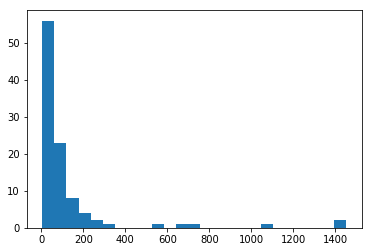

In [37]:
hist(raw['Black Drug Possession Arrests'].fillna(0), bins=25)

# Means and the Normal distribution

If we look at the mean of the distribution above, we get a high average for arrests, when it's clear that the majority of the data are closer to 0, but larger cities like Los Angeles or Oakland skew the mean upward.

In [38]:
raw['Black Drug Possession Arrests'].fillna(0).mean()

127.42

# Variance-stabilizing transform

The mean/standard deviation functions often used in statistics make the assumption that the data follows a Normal/Gaussian distribution, also known as a bell curve. When the histogram of our data looks very different from a bell curve, we need to apply a variance-stabilizing transform. In the case of the log-Normal distribution above, taking the log of the data gives us a normal distribution and puts smaller cities and larger cities on the same scale. Since the log of 0 is undefined, we add one to any zero counts, and since log(1) is zero, this has the effect of keeping the zero values zero after the transform.

(array([ 2.,  2.,  7., 22., 30., 19., 10.,  2.,  3.,  3.]),
 array([1.38629436, 1.97580349, 2.56531262, 3.15482175, 3.74433088,
        4.33384001, 4.92334914, 5.51285827, 6.1023674 , 6.69187653,
        7.28138566]),
 <a list of 10 Patch objects>)

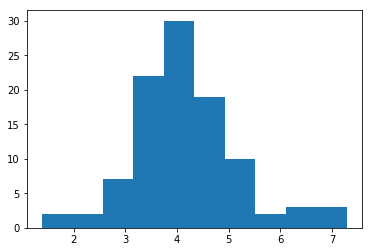

In [39]:
hist(numpy.log(raw['Black Drug Possession Arrests'].fillna(0) + 1))

We can operate on the log-transformed scale for statistics like the mean and standard deviation, and take the exponent when we need to transform back into the original scale (for example, the formula below computes the log average).

In [40]:
numpy.exp(numpy.log(raw['Black Drug Possession Arrests'].fillna(0) + 1).mean())

64.20200975752935

# Population Statistics

Here we use the population statistics from the OpenJustice database (2016) multiplied by the proportions by race, rather than using the Census/ACS, to maintain consistency with the other scores that rely on these figures.

In [42]:
total_pop = raw['Total Population']
black_pop = raw['Black Population']
black_pct_pop = black_pop / total_pop
latinx_pop = raw['Hispanic Population']
latinx_pct_pop = latinx_pop / total_pop
white_pop = raw['White Population']
white_pct_pop = white_pop / total_pop

# Drug Arrest Disparities

Since [rates of drug use are similar across racial groups](https://store.samhsa.gov/system/files/nsduhresults2013.pdf), disparities in arrests for drug possession suggest racial bias in policing.

The disparities for Black and Latinx drug arrests are calculated using the following formulae for each municipal police department in California:

$$Black\ drug\ arrest\ disparity = \dfrac{(Black\ drug\ arrests\ /\ Black\ population)}{(White\ drug\ arrests\ /\ White\ population)}$$

$$Latinx\ drug\ arrest\ disparity = \dfrac{(Latinx\ drug\ arrests\ /\ Latinx\ population)}{(White\ drug\ arrests\ /\ White\ population)}$$

To reasonably compare disparities across different racial and ethnic groups, we want to ultimately transform the scores into a Normal/Gaussian distribution and use standard scores (also known as Z-scores). We use the logit or log-odds, which is a common transform for stabilizing the variance in data consisting of percentages. Starting from the initial per-group percentages for each department:

$$\%\ Black\ arrested = \dfrac{Black\ drug\ arrests}{Black\ population}$$

$$\%\ Latinx\ arrested = \dfrac{Latinx\ drug\ arrests}{Latinx\ population}$$

$$\%\ White\ arrested = \dfrac{White\ drug\ arrests}{White\ population}$$

We calculate the logit for each racial/ethnic group as:

$$logit(\%\ group\ arrested) = \log\left(\dfrac{\%\ group\ arrested}{1 - \%\ group\ arrested}\right)$$

Since the logit of the two percentages is now in log-space, we take the difference of the two quantities rather than the quotient (since $\log_b(x/y) = \log_b(x) - \log_b(y)$), to calculate the normalized disparity:

$$log(Black\text{-}White\ drug\ arrest\ disparity) = logit(\%\ Black\ arrested) - logit(\%\ White\ arrested)$$

Similarly for Latinx drug arrests:

$$log(Latinx\text{-}White\ drug\ arrest\ disparity) = logit(\%\ Latinx\ arrested) - logit(\%\ White\ arrested)$$

The log-disparity scores are now normalized so departments can effectively be compared with one another for each group. We then use a standard score, which transforms the log-disparity into the number of standard deviations above or below the mean for each distribution, and allows us to compare a department's . If treatment is equal, 

$$Z\text{-}score = \dfrac{x-\mu}{\sigma}$$

The Z-score tells us "how many standard deviations


In [43]:
black_drug_arrests = raw['Black Drug Possession Arrests'].fillna(0)
latinx_drug_arrests = raw['Hispanic Drug Possession Arrests'].fillna(0)
white_drug_arrests = raw['White Drug Possession Arrests'].fillna(0)

total_drug_arrests = black_drug_arrests + latinx_drug_arrests + white_drug_arrests

In [44]:
black_pct_drug_arrests = black_drug_arrests / total_drug_arrests
pct_black_pop_arrested_drugs = black_drug_arrests / black_pop
white_pct_drug_arrests = white_drug_arrests / total_drug_arrests
pct_white_pop_arrested_drugs = white_drug_arrests / white_pop
latinx_pct_drug_arrests = latinx_drug_arrests[latinx_drug_arrests != 0] / total_drug_arrests
pct_latinx_pop_arrested_drugs = latinx_drug_arrests[latinx_drug_arrests != 0] / latinx_pop


In [45]:
logit_white_drug = numpy.log(pct_white_pop_arrested_drugs/(1-pct_white_pop_arrested_drugs))

In [46]:
logit_latinx_drug = numpy.log(pct_latinx_pop_arrested_drugs/(1-pct_latinx_pop_arrested_drugs))
logit_latinx_drug_arrest_disparity = (logit_latinx_drug - logit_white_drug)
latinx_drug_arrest_z_scores = (logit_latinx_drug_arrest_disparity - logit_latinx_drug_arrest_disparity.mean()) / logit_latinx_drug_arrest_disparity.std()

In [49]:
logit_black_drug = numpy.log(pct_black_pop_arrested_drugs/(1-pct_black_pop_arrested_drugs))
logit_black_drug_arrest_disparity = (logit_black_drug - logit_white_drug)
black_drug_arrest_z_scores = (logit_black_drug_arrest_disparity - logit_black_drug_arrest_disparity.mean()) / logit_black_drug_arrest_disparity.std()


(array([ 8., 18., 21., 23., 19.,  6.,  1.,  1.,  1.,  2.]),
 array([-1.7855876 , -1.23727195, -0.68895629, -0.14064064,  0.40767502,
         0.95599067,  1.50430633,  2.05262199,  2.60093764,  3.1492533 ,
         3.69756895]),
 <a list of 10 Patch objects>)

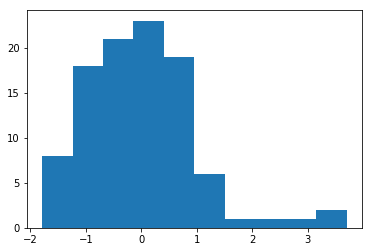

In [50]:
hist(black_drug_arrest_z_scores)

In [51]:
drug_disparities = pandas.DataFrame({
    'agency_name': raw['Agency Name'],
    'pct_of_black_pop_arrested_drugs': black_drug_arrests / black_pop,
    'pct_of_hispanic_pop_arrested_drugs': latinx_drug_arrests / latinx_pop,
    'pct_of_white_pop_arrested_drugs': white_drug_arrests / white_pop,
    'black_drug_arrest_disparity': (black_drug_arrests / black_pop) / (white_drug_arrests / white_pop),
    'black_drug_arrest_z_score': black_drug_arrest_z_scores,
    'hispanic_drug_arrest_disparity': (latinx_drug_arrests / latinx_pop) / (white_drug_arrests / white_pop),
    'hispanic_drug_arrest_z_score': latinx_drug_arrest_z_scores,
})

drug_disparities['max_drug_arrest_disparity_score'] = drug_disparities[['black_drug_arrest_z_score', 'hispanic_drug_arrest_z_score']].fillna(0.0).max(axis=1)
drug_disparities['max_drug_arrest_disparity_score_percentile'] = 1.0 - drug_disparities.max_drug_arrest_disparity_score.rank(pct=True)


In [52]:
drug_disparities.sort_values('max_drug_arrest_disparity_score_percentile')

,agency_name,black_drug_arrest_disparity,black_drug_arrest_z_score,hispanic_drug_arrest_disparity,hispanic_drug_arrest_z_score,pct_of_black_pop_arrested_drugs,pct_of_hispanic_pop_arrested_drugs,pct_of_white_pop_arrested_drugs,max_drug_arrest_disparity_score,max_drug_arrest_disparity_score_percentile
6,Beverly Hills Police Department,55.260870,3.697569,4.973575,2.951851,0.104859,0.009438,0.001898,3.697569,0.00
47,Newport Beach Police Department,37.432970,3.528331,2.296865,1.690028,0.301075,0.018474,0.008043,3.528331,0.01
54,Palo Alto Police Department,24.197792,2.708439,5.007625,2.969386,0.068577,0.014192,0.002834,2.969386,0.02
5,Berkeley Police Department,14.225807,2.067133,1.862074,1.332576,0.039609,0.005185,0.002784,2.067133,0.03
44,Mountain View Police Department,7.111958,1.258386,2.455356,1.790788,0.025735,0.008885,0.003619,1.790788,0.04
86,Sunnyvale Police Department,5.060031,0.859939,2.335793,1.707668,0.017040,0.007866,0.003368,1.707668,0.05
48,Oakland Police Department,9.190755,1.532143,1.787912,1.262908,0.006526,0.001270,0.000710,1.532143,0.06
80,Santa Monica Police Department,8.717792,1.485601,1.625791,1.108501,0.019991,0.003728,0.002293,1.485601,0.07
32,Glendale Police Department,4.661077,0.778269,1.997252,1.454328,0.030485,0.013063,0.006540,1.454328,0.08
38,Livermore Police Department,8.054450,1.430769,0.903591,0.142030,0.054237,0.006085,0.006734,1.430769,0.09


# Police Use of Deadly Force

We begin this work from the premise that it is possible to live in a world where police don't kill people. Period. Even if the use of deadly force by police is a relatively "rare" event, it's all too common in the US compared to other countries, and there are [proven, well-researched policies](https://joincampaignzero.org) which significantly reduce police violence and improve accountability. Since this is the most traumatic and visible form of police violence, especially for Black and Latinx communities that are routinely and disproportionately criminalized and over-policed, we wanted to examine the additional disparities in deadly force given that an arrest took place. In Movement work, it is often said that if police treated everyone the way they treat white people, we would be closer to the world we want to see.

We define a model of that idea, specficially around the question: what would deaths by police look like in a given city *if the victims had been white*?

Imagine that every interaction with police is a single round of Russian roulette and white people are given two levels of advantage: first, they simply don't have to play the game as often, and when they do, they're given a different revolver with fewer chambers loaded. Both lead to disproportionate use of deadly force against communities of color. The first advantage (not having to interact with the police as much in the first place) is accounted for in the arrest disparity scores, and here we want to examine what happens *given* that an arrest did occur, and how that changes when a person of color is arrested.

We model use deadly force for each racial/ethnic group as a Binomial distribution:

$$Deadly\ force \sim \operatorname{Binomial} \left({n, p}\right)$$

where we estimate the probability of being killed by police in a given year $p$ as the fraction of white residents who were killed in each city given that they were arrested, using a statewide prior probability to handle the case of zero-values.

$$p = \begin{cases} \frac{white\ residents\ killed\ by\ department}{white\ residents\ arrested\ by\ department} &\mbox{if }  white\ residents\ killed\ by\ department \gt 0 \\
\frac{white\ residents\ killed\ by\ police\ statewide}{white\ residents\ arrested\ statewide} & \mbox{if } white\ residents\ killed\ by\ department = 0
\end{cases}$$

running $n$ Bernoulli trials for each Black or Latinx resident who was arrested.

$$n = \#\ of\ arrests\ in\ the\ population\ being\ considered\ (Black\ or\ Latinx)$$

We can then reason about the probability of observing the actual outcome (the number of Black and Latinx victims of deadly force) with

The mean of a Binomial distribution is:

$$\mu = np$$

the variance is:

$$\sigma^2 = np(1-p)$$

and the standard deviation is:

$$\sigma = \sqrt{np(1-p)}$$

Using the mean and standard deviation, we can convert the actual number of deaths by police $x$ for Black and Latinx residents to a standard score (Z-score) using the formula $\frac{x - \mu}{\sigma}$, which tells us how much the observed number of deaths for Black and Latinx residents deviates from what would happen in $n$ arrests of white residents.

**Note**: we use arrests instead of the population for this part of the analysis, since racial bias in arrests is already accounted for in other parts of the score (and there are cases like Oakland where, because they have adopted better deadly force policies, in 2016 they didn't kill people at nearly the same rates as other cities even given the fact that Oakland has a lot of work to do on reducing arrest disparities). This section of the score focuses on the disproportionate use of deadly force even when controlling for disparities in arrests. If we were instead looking at deadly force on its own, we could use population (the columns below tha end in `_by_pop`) instead of arrests to capture racial bias throughout the entire system.

In [54]:
black_arrests = raw['Black Arrests']
latinx_arrests = raw['Hispanic Arrests']
white_arrests = raw['White Arrests']

total_arrests =  black_arrests + latinx_arrests + white_arrests

black_deadly_force = raw['Black Victims of Deadly Force']
latinx_deadly_force = raw['Hispanic Victims of Deadly Force']
white_deadly_force = raw['White Victims of Deadly Force']
total_deadly_force = black_deadly_force + latinx_deadly_force + white_deadly_force

avg_deadly_force_per_white_population = float(white_deadly_force.sum()) / white_pop.sum()
avg_deadly_force_per_white_arrest = float(white_deadly_force.sum()) / white_arrests.sum()

deadly_force = pandas.DataFrame({
    'agency_name': raw['Agency Name'],
    'black_actual': black_deadly_force,
    'hispanic_actual': latinx_deadly_force,
    'white_actual': white_deadly_force,
    'total_actual': total_deadly_force,
    'white_deadly_force_by_pop': numpy.exp(numpy.log(numpy.where(white_deadly_force > 0, white_deadly_force, white_deadly_force.sum())) - numpy.log(numpy.where(white_deadly_force > 0, white_pop, white_pop.sum())) ),
    'white_deadly_force_by_arrest': numpy.exp(numpy.log(numpy.where(white_deadly_force > 0, white_deadly_force, white_deadly_force.sum())) - numpy.log(numpy.where(white_deadly_force > 0, white_arrests, white_arrests.sum())) ),
})

deadly_force['black_mean_by_pop'] = black_pop * deadly_force.white_deadly_force_by_pop
deadly_force['black_variance_by_pop'] = black_pop * deadly_force.white_deadly_force_by_pop * (1 - deadly_force.white_deadly_force_by_pop)
deadly_force['black_stdev_by_pop'] = numpy.sqrt(deadly_force.black_variance_by_pop)
deadly_force['black_zscore_by_pop'] = (black_deadly_force - deadly_force.black_mean_by_pop) / deadly_force.black_stdev_by_pop

deadly_force['black_mean_by_arrest'] = black_arrests * deadly_force.white_deadly_force_by_arrest
deadly_force['black_variance_by_arrest'] = black_arrests * deadly_force.white_deadly_force_by_arrest * (1 - deadly_force.white_deadly_force_by_arrest)
deadly_force['black_stdev_by_arrest'] = numpy.sqrt(deadly_force.black_variance_by_arrest)
deadly_force['black_zscore_by_arrest'] = (black_deadly_force - deadly_force.black_mean_by_arrest) / deadly_force.black_stdev_by_arrest

deadly_force['hispanic_mean_by_pop'] = latinx_pop * deadly_force.white_deadly_force_by_pop
deadly_force['hispanic_variance_by_pop'] = latinx_pop * deadly_force.white_deadly_force_by_pop * (1 - deadly_force.white_deadly_force_by_pop)
deadly_force['hispanic_stdev_by_pop'] = numpy.sqrt(deadly_force.hispanic_variance_by_pop)
deadly_force['hispanic_zscore_by_pop'] = (latinx_deadly_force - deadly_force.hispanic_mean_by_pop) / deadly_force.hispanic_stdev_by_pop

deadly_force['hispanic_mean_by_arrest'] = latinx_arrests * deadly_force.white_deadly_force_by_arrest
deadly_force['hispanic_variance_by_arrest'] = latinx_arrests * deadly_force.white_deadly_force_by_arrest * (1 - deadly_force.white_deadly_force_by_arrest)
deadly_force['hispanic_stdev_by_arrest'] = numpy.sqrt(deadly_force.hispanic_variance_by_arrest)
deadly_force['hispanic_zscore_by_arrest'] = (latinx_deadly_force - deadly_force.hispanic_mean_by_arrest) / deadly_force.hispanic_stdev_by_arrest

deadly_force['deadly_force_score'] = deadly_force[['black_zscore_by_arrest', 'hispanic_zscore_by_arrest']].max(axis=1)
deadly_force['deadly_force_score_percentile'] = 1.0 - deadly_force.deadly_force_score.rank(pct=True)
deadly_force.sort_values('deadly_force_score')



,agency_name,black_actual,hispanic_actual,total_actual,white_actual,white_deadly_force_by_arrest,white_deadly_force_by_pop,black_mean_by_pop,black_variance_by_pop,black_stdev_by_pop,black_zscore_by_pop,black_mean_by_arrest,black_variance_by_arrest,black_stdev_by_arrest,black_zscore_by_arrest,hispanic_mean_by_pop,hispanic_variance_by_pop,hispanic_stdev_by_pop,hispanic_zscore_by_pop,hispanic_mean_by_arrest,hispanic_variance_by_arrest,hispanic_stdev_by_arrest,hispanic_zscore_by_arrest,deadly_force_score,deadly_force_score_percentile
48,Oakland Police Department,1,0,3,2,0.000655,0.000017,1.699430,1.699402,1.303611,-0.536533,12.565640,12.557405,3.543643,-3.263771,1.930956,1.930924,1.389577,-1.389600,3.865478,3.862945,1.965438,-1.966727,-1.966727,0.99
18,Culver City Police Department,0,0,1,1,0.001053,0.000052,0.161180,0.161172,0.401462,-0.401483,2.191943,2.189634,1.479741,-1.481302,0.475789,0.475765,0.689757,-0.689793,2.011848,2.009729,1.417649,-1.419144,-1.419144,0.98
73,San Leandro Police Department,0,0,1,1,0.000702,0.000052,0.558446,0.558416,0.747273,-0.747312,1.626943,1.625801,1.275069,-1.275965,1.302361,1.302293,1.141180,-1.141240,1.210708,1.209858,1.099936,-1.100708,-1.100708,0.97
60,Redlands Police Department,0,0,4,4,0.001528,0.000107,0.574004,0.573943,0.757590,-0.757671,1.166667,1.164885,1.079298,-1.080949,2.159452,2.159221,1.469429,-1.469586,3.858025,3.852131,1.962685,-1.965687,-1.080949,0.96
84,South San Francisco Police Department,0,1,3,2,0.001699,0.000158,0.223736,0.223701,0.472970,-0.473045,0.781046,0.779719,0.883017,-0.884520,3.805261,3.804658,1.950553,-1.438187,3.026144,3.021002,1.738103,-1.165721,-0.884520,0.95
57,Pleasanton Police Department,0,0,2,2,0.001265,0.000048,0.068392,0.068389,0.261513,-0.261526,0.728155,0.727234,0.852780,-0.853860,0.379024,0.379006,0.615634,-0.615664,1.216019,1.214481,1.102035,-1.103431,-0.853860,0.94
12,Chula Vista Police Department,0,1,1,0,0.000446,0.000033,0.438534,0.438519,0.662208,-0.662230,0.715049,0.714730,0.845417,-0.845794,5.346471,5.346292,2.312205,-1.879795,3.475884,3.474333,1.863956,-1.328295,-0.845794,0.93
19,Daly City Police Department,0,0,0,0,0.000446,0.000033,0.103412,0.103409,0.321572,-0.321583,0.682347,0.682042,0.825859,-0.826227,0.845277,0.845249,0.919374,-0.919405,0.839008,0.838634,0.915770,-0.916178,-0.826227,0.92
52,Oxnard Police Department,0,3,3,0,0.000446,0.000033,0.177402,0.177396,0.421184,-0.421198,0.596262,0.595996,0.772007,-0.772352,5.223744,5.223570,2.285513,-0.972974,8.916307,8.912329,2.985352,-1.981779,-0.772352,0.91
0,Alameda Police Department,0,0,1,1,0.000756,0.000030,0.182863,0.182857,0.427618,-0.427631,0.748120,0.747554,0.864612,-0.865267,0.302846,0.302837,0.550306,-0.550323,0.571429,0.570996,0.755643,-0.756215,-0.756215,0.90


# Police Violence Score Calculation

In all our calculations, we grade departments on the highest (worst) of its scores between the Black and Latinx community in a city to ensure that racially biased policing against one marginalized group is not being erased or offset due to more equitable treatment of another group.

$$Max\ deadly\ force\ score = \max{(Black\ deadly\ force\ score,\ Latinx\ deadly\ force\ score)}$$

$$Max\ deadly\ force\ score = \max{(Black\ deadly\ force\ score,\ Latinx\ deadly\ force\ score)}$$

In [67]:
output = pandas.DataFrame()

output['police_department'] = raw['Agency Name']
output['black_drug_arrest_disparity'] = drug_disparities.black_drug_arrest_disparity
output['black_drug_arrest_score'] = drug_disparities.black_drug_arrest_z_score
output['hispanic_drug_arrest_disparity'] = drug_disparities.hispanic_drug_arrest_disparity
output['hispanic_drug_arrest_score'] = drug_disparities.hispanic_drug_arrest_z_score
output['drug_arrest_disparity_score'] = output[['black_drug_arrest_score', 'hispanic_drug_arrest_score']].max(axis=1)

output['black_deadly_force_score'] = deadly_force.black_zscore_by_arrest
output['hispanic_deadly_force_score'] = deadly_force.hispanic_zscore_by_arrest
output['deadly_force_score'] = output[['black_deadly_force_score', 'hispanic_deadly_force_score']].max(axis=1)

In [76]:
output.sort_values('drug_arrest_disparity_score')

,police_department,black_drug_arrest_disparity,black_drug_arrest_score,hispanic_drug_arrest_disparity,hispanic_drug_arrest_score,drug_arrest_disparity_score,black_deadly_force_score,hispanic_deadly_force_score,deadly_force_score
56,Pittsburg Police Department,0.835360,-1.213963,0.398239,-1.210118,-1.210118,0.308177,3.665970,3.665970
46,National City Police Department,1.097460,-0.898743,0.426813,-1.101865,-0.898743,0.991506,-1.274921,0.991506
23,Elk Grove Police Department,1.144792,-0.852002,0.092652,-3.594238,-0.852002,0.766204,2.755218,2.755218
4,Bakersfield Police Department,1.166227,-0.827043,0.392177,-1.246920,-0.827043,-0.142382,3.118153,3.118153
3,Antioch Police Department,1.293171,-0.711438,0.305692,-1.639933,-0.711438,0.639079,-1.343894,0.639079
98,Westminster Police Department,1.241135,-0.756042,0.545247,-0.696078,-0.696078,-0.323776,-0.912660,-0.323776
12,Chula Vista Police Department,1.261367,-0.739715,0.546314,-0.686727,-0.686727,-0.845794,-1.328295,-0.845794
50,Ontario Police Department,0.778789,-1.296446,0.551327,-0.679485,-0.679485,-0.480943,-0.908620,-0.480943
73,San Leandro Police Department,1.078481,-0.920058,0.575877,-0.598703,-0.598703,-1.275965,-1.100708,-1.100708
26,Fontana Police Department,0.628442,-1.541846,0.578675,-0.595462,-0.595462,0.397811,-0.266396,0.397811


In [68]:
output.sort_values('deadly_force_score')

,police_department,black_drug_arrest_disparity,black_drug_arrest_score,hispanic_drug_arrest_disparity,hispanic_drug_arrest_score,drug_arrest_disparity_score,black_deadly_force_score,hispanic_deadly_force_score,deadly_force_score
48,Oakland Police Department,9.190755,1.532143,1.787912,1.262908,1.532143,-3.263771,-1.966727,-1.966727
18,Culver City Police Department,2.808231,0.182230,1.836284,1.312536,1.312536,-1.481302,-1.419144,-1.419144
73,San Leandro Police Department,1.078481,-0.920058,0.575877,-0.598703,-0.598703,-1.275965,-1.100708,-1.100708
60,Redlands Police Department,1.170034,-0.825336,1.330928,0.783969,0.783969,-1.080949,-1.965687,-1.080949
84,South San Francisco Police Department,1.583497,-0.472616,0.405454,-1.184449,-0.472616,-0.884520,-1.165721,-0.884520
57,Pleasanton Police Department,4.840223,0.808806,1.164516,0.559972,0.808806,-0.853860,-1.103431,-0.853860
12,Chula Vista Police Department,1.261367,-0.739715,0.546314,-0.686727,-0.686727,-0.845794,-1.328295,-0.845794
19,Daly City Police Department,2.383605,0.009199,0.373054,-1.322952,0.009199,-0.826227,-0.916178,-0.826227
52,Oxnard Police Department,1.610723,-0.454294,0.898193,0.131308,0.131308,-0.772352,-1.981779,-0.772352
0,Alameda Police Department,1.897261,-0.274141,1.684697,1.166154,1.166154,-0.865267,-0.756215,-0.756215


In [70]:
output.to_excel('data/processed/police_violence_2016-2018.xlsx', index=False)